In [1]:
# imports
import operator
import random
import numpy
import math

from deap import base, benchmarks, creator, tools

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
db = load_boston()
cmin = math.pow(2, -15)
cmax = math.pow(2, 3)
gmin = math.pow(2, -5)
gmax = math.pow(2, 15)

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, best=None, C=None, gamma=None)

In [4]:
def generate(size, cmin, cmax, gmin, gmax):
    part = creator.Particle([random.uniform(cmin, cmax), random.uniform(gmin, gmax)]) 
    part.speed = [random.uniform(0.1, 0.5)]
    return part

In [5]:
def updateParticle(part, best, phi1, phi2):
#     print(part.best)
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part))
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part))
#     print("{} {} {} {}".format(u1, u2, v_u1, v_u2))
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if speed < 0.1:
            part.speed[i] = 0.1
        elif speed > 0.5:
            part.speed[i] = 0.5
    
#     print(list(map(operator.mul, part, part.speed)))
#     part[:0] = list(map(operator.mul, part, part.speed))
#     part[:1] = list(map(operator.add, part, part.speed))
#     print(part)
    
    x = list(map(operator.mul, part, part.speed))
    part[0] = part[0] * x[0] + 0.0001
    part[1] = part[1] * x[0] + 0.0001

In [6]:
def evaluate(part):
    X = db.data
    y = db.target
    
    clf = SVR(kernel='rbf', C=part[0], gamma=part[1])
    
    scores = cross_val_score(clf, X, y, cv=5)
    acc = scores.mean()
    
    return acc,

In [7]:
toolbox = base.Toolbox()
toolbox.register("particle", generate, size=2, cmin=cmin, cmax=cmax, gmin=gmin, gmax=gmax)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle, phi1=1.0, phi2=1.0)
toolbox.register("evaluate", evaluate)

In [8]:
def main():
    pop = toolbox.population(n=20)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    GEN = 500
    best = None
    
    for g in range(GEN):
        for part in pop:
            if len(part) == 0:
                break
            part.fitness.values = toolbox.evaluate(part)
            if not part.best or part.best.fitness < part.fitness:
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values
            if not best or best.fitness < part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
        for part in pop:
            toolbox.update(part, best)

        # Gather all the fitnesses in one list and print the stats
        logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
        print(logbook.stream)
    
    return pop, logbook, best

In [9]:
def plot(items):
    gens = []
    avgs = []
    
    for item in items:
        gens.append(item['gen'])
        avgs.append(item['avg'])
    
    plt.plot(gens, avgs)

gen	evals	avg      	std      	min      	max      
0  	20   	-0.592669	0.0201786	-0.631284	-0.569956
1  	20   	-0.579557	0.0124789	-0.617993	-0.569948
2  	20   	-0.577813	0.0037631	-0.583422	-0.572556
3  	20   	-0.579976	0.00314232	-0.584104	-0.572785
4  	20   	-0.582336	0.00211686	-0.584107	-0.575526
5  	20   	-0.583244	0.00107476	-0.584103	-0.579399
6  	20   	-0.583578	0.00044662	-0.584107	-0.582605
7  	20   	-0.583438	0.000337983	-0.584108	-0.58321 
8  	20   	-0.583257	0.000195333	-0.584108	-0.58321 
9  	20   	-0.583212	7.20694e-06	-0.583243	-0.58321 
10 	20   	-0.58321 	3.70369e-10	-0.58321 	-0.58321 
11 	20   	-0.58321 	2.55518e-14	-0.58321 	-0.58321 
12 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
13 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
14 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
15 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
16 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
17 	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
18 	20   	-0.58321 	1.11

157	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
158	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
159	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
160	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
161	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
162	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
163	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
164	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
165	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
166	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
167	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
168	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
169	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
170	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
171	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
172	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
173	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
174	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
175	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
176	20   	-0

315	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
316	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
317	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
318	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
319	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
320	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
321	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
322	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
323	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
324	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
325	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
326	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
327	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
328	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
329	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
330	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
331	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
332	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
333	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
334	20   	-0

473	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
474	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
475	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
476	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
477	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
478	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
479	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
480	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
481	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
482	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
483	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
484	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
485	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
486	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
487	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
488	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
489	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
490	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
491	20   	-0.58321 	1.11022e-16	-0.58321 	-0.58321 
492	20   	-0

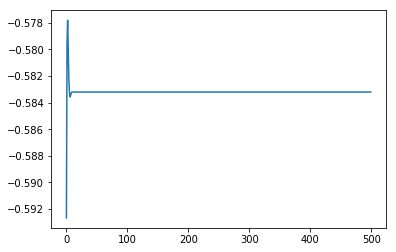

In [10]:
if __name__ == "__main__":
    results = main()
#     print(results[1])
    plot(results[1])